## How to read a book in Python

This notebook illustrates how we can explore data and extract some useful information with a few basic Python commands. It is exemplary for the process of working with real data in the sense that

- we start with raw data
- we explore the data
- we understand how the data is structured
- we clean the data
- we visualize some aspects of the data
- we find outliers and inconsistencies
- we do more visualization to gain insights into the actual content of the data


We need the following imports.Numpy is for numerical operations, pandas is for data manipulation, matplotlib and seaborn for plotting, and re for text processing. 

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

### Reading the raw data

We start by reading the content of the book.

In [88]:
book_file = open("./data/around-the-world.txt", "r", encoding="utf-8")
book = book_file.read()
book_file.close()

### A first exploration of the data

To check if we read what we expect, we estimate the number of pages in the book. We do this by counting the number of characters in the book and dividing it by a reasonable estimate of the number of characters on a page.

In [89]:
avg_chars_per_page = 1250
print("This book has an estimated", len(book) // avg_chars_per_page, "pages")

This book has an estimated 310 pages


Let's look at the first few characters of the book.

In [90]:
print(book[0:1500])

The Project Gutenberg eBook of Around the World in Eighty Days, by Jules Verne

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Around the World in Eighty Days

Author: Jules Verne

Translator: G. M. Towle

Release Date: January, 1994 [eBook #103]
[Most recently updated: August 6, 2021]

Language: English

Character set encoding: UTF-8


*** START OF THE PROJECT GUTENBERG EBOOK AROUND THE WORLD IN EIGHTY DAYS ***

[Illustration]




Around the World in Eighty Days

by Jules Verne


Contents

 CHAPTER I. IN WHICH PHILEAS FOGG AND PASSEPARTOUT ACCEPT EACH OTHER, THE ONE AS MASTER, THE OTHER A

We see that the beginning of the book is a preamble followed by a table of contents. The actual content of the book start with Chapter 1. We also find that the patter `***` is used to separate project info from the actual content of the text. 

### Basic data cleaning

We can use the pattern to split the text into chapters. 

In [91]:
chapters_ = re.split("CHAPTER |\*\*\* END OF THE ", book)

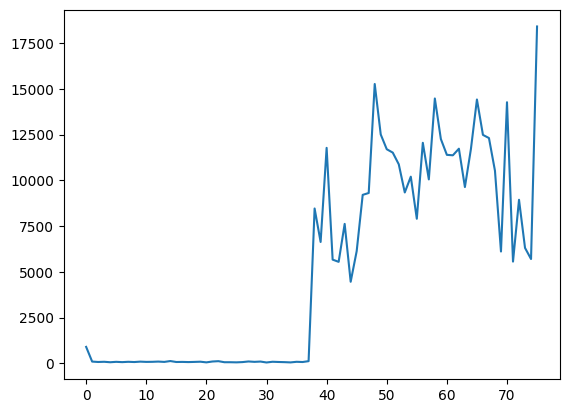

In [92]:
plt.plot([len(chapter) for chapter in chapters_])

In [93]:
# Let's find the first real chapter
print(chapters_[-1])

PROJECT GUTENBERG EBOOK AROUND THE WORLD IN EIGHTY DAYS ***

Updated editions will replace the previous one--the old editions will
be renamed.

Creating the works from print editions not protected by U.S. copyright
law means that no one owns a United States copyright in these works,
so the Foundation (and you!) can copy and distribute it in the
United States without permission and without paying copyright
royalties. Special rules, set forth in the General Terms of Use part
of this license, apply to copying and distributing Project
Gutenberg-tm electronic works to protect the PROJECT GUTENBERG-tm
concept and trademark. Project Gutenberg is a registered trademark,
and may not be used if you charge for an eBook, except by following
the terms of the trademark license, including paying royalties for use
of the Project Gutenberg trademark. If you do not charge anything for
copies of this eBook, complying with the trademark license is very
easy. You may use this eBook for nearly any purpose s

The first chapters are not part of the book. We can remove them.

In [94]:
chapters = chapters_[38:-1] 

### Some more exploration

Lets try to get some more insights into the book. We start by counting the number of characters in each chapter and also count the number of periods. We can use this to estimate the number of sentences in each chapter.
As we also know from prior knowledge, that the term `Mr.` is used a lot, we subtract this from the number of periods to get a better estimate of the number of sentences.

In [95]:
n_chars = []
n_periods = []
for chapter in chapters:
    n_chars.append(len(chapter))
    n_periods.append(chapter.count(".") - chapter.count("Mr."))

Let's plot it.

Text(0, 0.5, 'Number of characters')

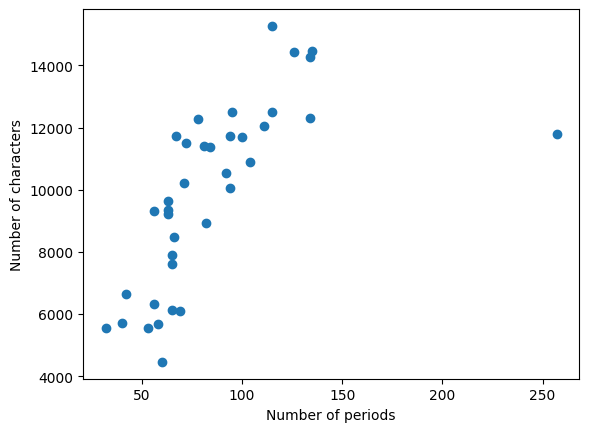

In [96]:
plt.scatter(n_periods, n_chars)
plt.xlabel("Number of periods")
plt.ylabel("Number of characters")


#### Investigating outliers

To find out which chapter has so many periods, we can for example plot the number of periods in each chapter.

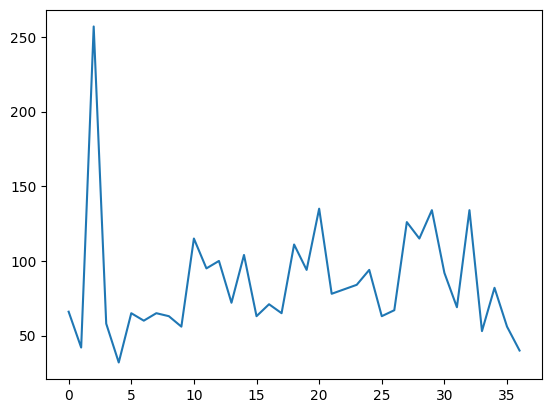

In [97]:
plt.plot([chapter.count(".") - chapter.count("Mr.") for chapter in chapters])

The culprit is chapter 2. Let's look at it.

In [98]:
print(chapters[2])

III.
IN WHICH A CONVERSATION TAKES PLACE WHICH SEEMS LIKELY TO COST PHILEAS
FOGG DEAR


Phileas Fogg, having shut the door of his house at half-past eleven,
and having put his right foot before his left five hundred and
seventy-five times, and his left foot before his right five hundred and
seventy-six times, reached the Reform Club, an imposing edifice in Pall
Mall, which could not have cost less than three millions. He repaired
at once to the dining-room, the nine windows of which open upon a
tasteful garden, where the trees were already gilded with an autumn
colouring; and took his place at the habitual table, the cover of which
had already been laid for him. His breakfast consisted of a side-dish,
a broiled fish with Reading sauce, a scarlet slice of roast beef
garnished with mushrooms, a rhubarb and gooseberry tart, and a morsel
of Cheshire cheese, the whole being washed down with several cups of
tea, for which the Reform is famous. He rose at thirteen minutes to
one, and directed

#### Insights

Next we get an idea of the story line by checking how often each of the main characters occur in each chapter. 

In [100]:
from collections import defaultdict

characters = ["Fogg", "Passepartout", "Fix", "Aouda", "Mudge"]

appearances = defaultdict(list)
for chapter in chapters:
    for character in characters:
        appearances[character].append(chapter.count(character))

It is often easier to organize data in a table. We can use the pandas library to do this.

In [102]:

appearances_df = pd.DataFrame(appearances)
appearances_df.head()

,Fogg,Passepartout,Fix,Aouda,Mudge
0,17,6,0,0,0
1,10,12,0,0,0
2,24,0,0,0,0
3,14,17,0,0,0
4,14,0,0,0,0


If we have tabular data, we usually use seaborn to plot it. 

<Axes: >

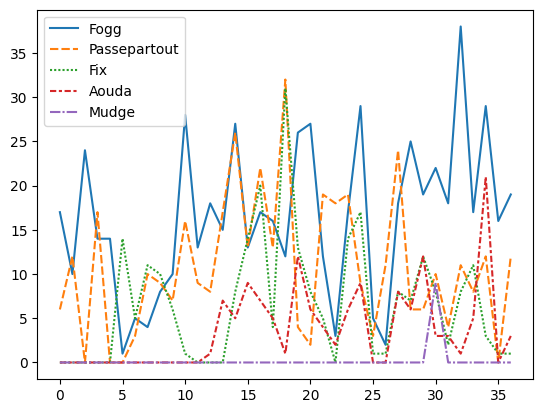

In [104]:
import seaborn as sns
sns.lineplot(appearances_df)


The plot is a bit chaotic. To get a better idea of what is happening, we smooth the data. 

<Axes: >

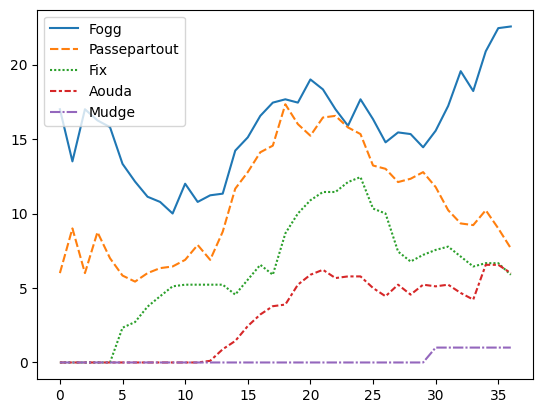

In [106]:
smoothed_df = appearances_df.rolling(window=9, min_periods=1).mean()
sns.lineplot(smoothed_df)

Now we have a nice and clear overview, how are the main figures in the plot and which character plays a role in which chapter - all without actually reading the book.